In [1]:
import pandas as pd
# Import necessary packages.!pip install torch
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
from torch.utils.data import random_split
from torch.utils.data import DataLoader, Subset

import torchvision
from torchvision import datasets
from torchvision.datasets import DatasetFolder
import torchvision.transforms as transforms
# This is for the progress bar.
from tqdm.auto import tqdm
# This is for ploting
import matplotlib.pyplot as plt

In [2]:
# Install a package to download data from Kaggle
!pip install -q opendatasets
!pip install --upgrade cudatoolkit

ERROR: Could not find a version that satisfies the requirement cudatoolkit (from versions: none)
ERROR: No matching distribution found for cudatoolkit


In [3]:
import opendatasets as od

# Read in the dataset and split
Using the ground truth metadata, the dataset will be split into their appropriate classes

In [4]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler

# Define your transforms for train and test datasets
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the same size
    transforms.ToTensor(),
    # Add more transforms if needed
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to the same size
    transforms.ToTensor(),
    # Add more transforms if needed
])

raw_train_path = "OneDrive/Downloads/Deep learning/datasets/isic_2019_train_raw"
train_meta_data_path = "OneDrive/Downloads/Deep learning/datasets/ISIC_2019_Training_GroundTruth.csv"
test_meta_data_path = "OneDrive/Downloads/Deep learning/datasets/"
train_raw = datasets.ImageFolder(raw_train_path, transform=train_transform)

In [5]:
metadata = pd.read_csv(train_meta_data_path)
metadata

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def determine_label(row):
    if row['MEL'] == 1.0:
        return 'melanoma'
    elif row['NV'] == 1.0:
        return 'melanocytic nevus'
    elif row['BCC'] == 1.0:
        return 'basal cell carcinoma'
    elif row['AK'] == 1.0:
        return 'actinic keratosis'
    elif row['BKL'] == 1.0:
        return 'benign keratosis'
    elif row['DF'] == 1.0:
        return 'dermatofibroma'
    elif row['VASC'] == 1.0:
        return 'vascular lesion'
    elif row['SCC'] == 1.0:
        return 'squamous cell carcinoma'
    elif row['UNK'] == 1.0:
        return 'unknown'
    else:
        return 'unlabeled'

# Apply the function to each row in the DataFrame
metadata['label'] = metadata.apply(determine_label, axis=1)
metadata

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,melanocytic nevus
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,melanocytic nevus
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,melanoma
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,melanocytic nevus
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,melanoma
...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,basal cell carcinoma
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,benign keratosis
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,melanoma
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,melanocytic nevus


In [7]:
import os
import shutil
from tqdm import tqdm
output_base = "OneDrive/Downloads/Deep learning/datasets/isic_2019_split"
train_path = output_base + "/train"
test_path = output_base + "/test"
image_folder_path = "OneDrive/Downloads/Deep learning/datasets/isic_2019_train_raw/ISIC_2019_Training_Input"
labels = metadata['label'].unique()
# for label in labels:
#     os.makedirs(os.path.join(train_path, label), exist_ok=True)

# # Copy images to respective label directories. Usinf tqdm to visualize the progress.
# for index, row in tqdm(metadata.iterrows(), total=metadata.shape[0], desc="Copying images"):
#     image_name = row['image'] + '.jpg'  # Assuming images are in .jpg format
#     label = row['label']
#     src_path = os.path.join(image_folder_path, image_name)
#     dest_path = os.path.join(train_path, label, image_name)
    
#     # Debug statements
#     if not os.path.exists(src_path):
#         print(f"File does not exist: {src_path}")
#     else:
#         shutil.copy(src_path, dest_path)

train_dataset = datasets.ImageFolder(train_path, transform=train_transform)

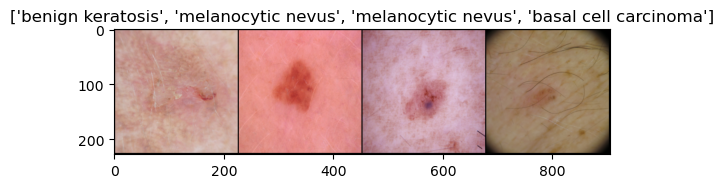

In [9]:
# show some samples
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
train_loader_for_vis = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
inputs, classes = next(iter(train_loader_for_vis))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

class_names = train_dataset.classes

imshow(out, title=[class_names[x] for x in classes])

In [10]:
# Define the base transform
base_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define augmentation transforms
augmentation_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
])

In [10]:
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset
class AugmentedDataset(Dataset):
    def __init__(self, image_folder, transform=None, augmentation_transform=None, target_counts=None):
        self.image_folder = image_folder
        self.transform = transform
        self.augmentation_transform = augmentation_transform
        self.samples = image_folder.samples
        self.target_counts = target_counts if target_counts else {}

        # Separate the samples by class
        self.class_samples = {class_name: [] for class_name in image_folder.classes}
        for path, label in self.samples:
            class_name = image_folder.classes[label]
            self.class_samples[class_name].append((path, label))
        
        # Create balanced samples
        self.balanced_samples = self._create_balanced_samples()

    def _create_balanced_samples(self):
        balanced_samples = []
        
        # Augment and add samples for each class based on target counts
        for class_name, target_count in self.target_counts.items():
            samples = self.class_samples[class_name]
            num_original = len(samples)
            if num_original < target_count:
                num_augmented = target_count - num_original
                balanced_samples.extend(samples)
                # Add augmented samples
                augmented_samples = samples * (num_augmented // num_original) + random.sample(samples, num_augmented % num_original)
                balanced_samples.extend(augmented_samples)
            else:
                balanced_samples.extend(samples[:target_count])

        return balanced_samples

    def __len__(self):
        return len(self.balanced_samples)

    def __getitem__(self, idx):
        path, label = self.balanced_samples[idx]
        image = self.image_folder.loader(path)
        if self.augmentation_transform and (self.balanced_samples.count((path, label)) > 1):
            image = self.augmentation_transform(image)
        elif self.transform:
            image = self.transform(image)
        return image, label

    @property
    def classes(self):
        return self.image_folder.classes


In [11]:
import random
from torch.utils.data import DataLoader

target_counts = {
    'actinic keratosis': 3167,
    'basal cell carcinoma': 3167,
    'benign keratosis': 3167,
    'dermatofibroma': 3167,
    'melanocytic nevus': 3167,
    'melanoma': 3167,
    'squamous cell carcinoma': 3167,
    'vascular lesion': 3167
}

# Create the augmented dataset
augmented_dataset = AugmentedDataset(
    image_folder=train_dataset,
    transform=base_transform,
    augmentation_transform=augmentation_transform,
    target_counts=target_counts
)

# Create dataloaders
train_loader = DataLoader(augmented_dataset, batch_size=32, shuffle=True)

# # Print the number of images in each class in the balanced dataset
# class_counts = {class_name: 0 for class_name in train_dataset.classes}
# for _, label in augmented_dataset:
#     class_name = train_dataset.classes[label]
#     class_counts[class_name] += 1

# for class_name, count in class_counts.items():
#     print(f"Class '{class_name}' contains {count} images in the balanced dataset.")

In [12]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split

#train_dataset = datasets.ImageFolder(train_path, transform=train_transform)

labels = [label for _, label in train_dataset.samples]
aug_labels = [label for _, label in augmented_dataset.samples]

# Split the dataset into training and validation/test sets using stratified split
train_idx, val_test_idx = train_test_split(
    list(range(len(labels))), test_size=0.4, stratify=labels, random_state=42
)

aug_train_idx, aug_val_test_idx = train_test_split(
    list(range(len(aug_labels))), test_size=0.4, stratify=aug_labels, random_state=42
)

# Further split the validation/test sets to create validation and test sets
val_idx, test_idx = train_test_split(
    val_test_idx, test_size=0.5, stratify=[labels[i] for i in val_test_idx], random_state=42
)

aug_val_idx, aug_test_idx = train_test_split(
    aug_val_test_idx, test_size=0.5, stratify=[aug_labels[i] for i in aug_val_test_idx], random_state=42
)

# Create Subsets for training, validation, and test sets
train_subset = Subset(train_dataset, train_idx)
val_subset = Subset(train_dataset, val_idx)
test_subset = Subset(train_dataset, test_idx)

aug_train_subset = Subset(augmented_dataset, aug_train_idx)
aug_val_subset = Subset(augmented_dataset, aug_val_idx)
aug_test_subset = Subset(augmented_dataset, aug_test_idx)

# Create DataLoaders for the training, validation, and test datasets
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_subset, batch_size=32, shuffle=False)

aug_train_loader = DataLoader(aug_train_subset, batch_size=32, shuffle=True)
aug_val_loader = DataLoader(aug_val_subset, batch_size=32, shuffle=False)
aug_test_loader = DataLoader(aug_test_subset, batch_size=32, shuffle=False)

# Print the number of images in each class in the training and validation datasets
# def count_classes(dataset, dataset_name):
#     class_counts = {class_name: 0 for class_name in train_dataset.classes}
#     for _, label in dataset:
#         class_name = train_dataset.classes[label]
#         class_counts[class_name] += 1
#     for class_name, count in class_counts.items():
#         print(f"Class '{class_name}' contains {count} images in the {dataset_name} dataset.")

# print("Training dataset:")
# count_classes(train_subset, "training")

# print("Validation dataset:")
# count_classes(val_subset, "validation")

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Baseline CNN

In [14]:
class MyCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(MyCNN, self).__init__()
        
        # Define convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # input channels: 3 (RGB), output channels: 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # input channels: 32, output channels: 64
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1), # input channels: 64, output channels: 128
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1), # input channels: 128, output channels: 256
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # The size after the conv layers is [256, 14, 14]
        # Calculate the number of features for the first fully connected layer
        self.fc_layers = nn.Sequential(
            nn.Dropout(0.5),  # Dropout layer to prevent overfitting
            nn.Linear(256 * 14 * 14, 512), # Input size based on calculated feature map size
            nn.ReLU(),
            nn.Linear(512, num_classes)  # Output layer with num_classes output units (e.g., 8 classes)
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the output of convolutional layers
        x = self.fc_layers(x)
        return x

basemodel = MyCNN(num_classes=8)
# basemodel.to(device)

CNN with Spatial Attention mechanism

In [15]:
class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        
        assert kernel_size in (3, 7), 'kernel size must be 3 or 7'
        padding = 3 if kernel_size == 7 else 1
        
        self.conv1 = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv1(x)
        return self.sigmoid(x)

class SpatCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(SpatCNN, self).__init__()
        
        # Define convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # input channels: 3 (RGB), output channels: 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # input channels: 32, output channels: 64
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1), # input channels: 64, output channels: 128
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1), # input channels: 128, output channels: 256
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Spatial attention layer
        self.spatial_attention = SpatialAttention(kernel_size=7)
        
        # The size after the conv layers is [256, 14, 14]
        # Calculate the number of features for the first fully connected layer
        self.fc_layers = nn.Sequential(
            nn.Dropout(0.5),  # Dropout layer to prevent overfitting
            nn.Linear(256 * 14 * 14, 512), # Input size based on calculated feature map size
            nn.ReLU(),
            nn.Linear(512, num_classes)  # Output layer with num_classes output units (e.g., 8 classes)
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        attn = self.spatial_attention(x)
        x = x * attn
        x = x.view(x.size(0), -1)  # Flatten the output of convolutional layers
        x = self.fc_layers(x)
        return x

spatmodel = SpatCNN(num_classes=8)
spatmodel.to(device)

SpatCNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (spatial_attention): SpatialAttention(
    (conv1): Conv2d(2, 1, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
    (sigmoid): Sigmoid()
  )
  (fc_layers): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=5

CNN with channel attention mechanism

In [16]:
class SEBlock(nn.Module):
    def __init__(self, channel, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)

class channelCNN(nn.Module):
    def __init__(self, num_classes=8, input_height=224, input_width=224):
        super(channelCNN, self).__init__()
        
        # Define convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # input channels: 3 (RGB), output channels: 32
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # input channels: 32, output channels: 64
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1), # input channels: 64, output channels: 128
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1), # input channels: 128, output channels: 256
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Channel attention layers
        self.se_blocks = nn.ModuleList([
            SEBlock(32),
            SEBlock(64),
            SEBlock(128),
            SEBlock(256)
        ])
        
        # Calculate the number of features for the first fully connected layer
        self.fc_input_features = 256 * (input_height // 16) * (input_width // 16) # Adjust based on input size
        self.fc_layers = nn.Sequential(
            nn.Dropout(0.5),  # Dropout layer to prevent overfitting
            nn.Linear(self.fc_input_features, 512), # Input size based on calculated feature map size
            nn.ReLU(),
            nn.Linear(512, num_classes)  # Output layer with num_classes output units (e.g., 8 classes)
        )
    
    def forward(self, x):
        for i in range(4):
            x = self.conv_layers[i * 4:(i + 1) * 4](x)
            x = self.se_blocks[i](x)
        x = x.view(x.size(0), -1)  # Flatten the output of convolutional layers
        x = self.fc_layers(x)
        return x


channelmodel = channelCNN(num_classes=8)
channelmodel.to(device)


channelCNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

CNN with Self-attention mechanism

In [35]:
class SelfAttention(nn.Module):
    def __init__(self, in_channels):
        super(SelfAttention, self).__init__()
        self.in_channels = in_channels
        self.query_conv = nn.Conv2d(in_channels, in_channels // 8, kernel_size=1)
        self.key_conv = nn.Conv2d(in_channels, in_channels // 8, kernel_size=1)
        self.value_conv = nn.Conv2d(in_channels, in_channels, kernel_size=1)
        self.gamma = nn.Parameter(torch.zeros(1))
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x):
        batch_size, C, width, height = x.size()
        proj_query = self.query_conv(x).view(batch_size, -1, width * height).permute(0, 2, 1)
        proj_key = self.key_conv(x).view(batch_size, -1, width * height)
        energy = torch.bmm(proj_query, proj_key)
        attention = self.softmax(energy)
        proj_value = self.value_conv(x).view(batch_size, -1, width * height)

        out = torch.bmm(proj_value, attention.permute(0, 2, 1))
        out = out.view(batch_size, C, width, height)
        out = self.gamma * out + x
        return out

class selfAttentionCNN(nn.Module):
    def __init__(self, num_classes=8):
        super(selfAttentionCNN, self).__init__()
        
        # Define convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # input channels: 3 (RGB), output channels: 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # input channels: 32, output channels: 64
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1), # input channels: 64, output channels: 128
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1), # input channels: 128, output channels: 256
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Self-attention layers
        self.attention_layers = nn.Sequential(
            SelfAttention(32),
            SelfAttention(64),
            SelfAttention(128),
            SelfAttention(256)
        )
        
        # The size after the conv layers is [256, 14, 14]
        # Calculate the number of features for the first fully connected layer
        self.fc_layers = nn.Sequential(
            nn.Dropout(0.5),  # Dropout layer to prevent overfitting
            nn.Linear(256 * 14 * 14, 512), # Input size based on calculated feature map size
            nn.ReLU(),
            nn.Linear(512, num_classes)  # Output layer with num_classes output units (e.g., 8 classes)
        )
    
    def forward(self, x):
        x = self.conv_layers[0:3](x)
        x = self.attention_layers[0](x)
        x = self.conv_layers[3:6](x)
        x = self.attention_layers[1](x)
        x = self.conv_layers[6:9](x)
        x = self.attention_layers[2](x)
        x = self.conv_layers[9:](x)
        x = self.attention_layers[3](x)
        x = x.view(x.size(0), -1)  # Flatten the output of convolutional layers
        x = self.fc_layers(x)
        return x

selfmodel = selfAttentionCNN(num_classes=8)
selfmodel.to(device)

selfAttentionCNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (attention_layers): Sequential(
    (0): SelfAttention(
      (query_conv): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
      (key_conv): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
      (value_conv): Conv2d(32, 32, kernel_size=(1, 

In [18]:
# import torch
# import torch.nn as nn
# from torchvision.models import resnet18, densenet121

# # Check device
# device = "cuda" if torch.cuda.is_available() else "cpu"

# model = MyCNN(num_classes=8)
# model = model.to(device)

# attmodel = AttentionCNN(num_classes=8)
# attmodel = attmodel.to(device)

# Initialize ResNet18
# resnet18 = resnet18(pretrained=False)
# num_ftrs_res18 = resnet18.fc.in_features
# resnet18.fc = nn.Linear(num_ftrs_res18, 8)

# # Initialize DenseNet121
# densenet121 = densenet121(pretrained=False)
# num_ftrs_d121 = densenet121.classifier.in_features
# densenet121.classifier = nn.Linear(num_ftrs_d121, 8)

# # Move models to the specified device
# resnet18 = resnet18.to(device)
# densenet121 = densenet121.to(device)

# # Example: Creating dummy input for testing
# dummy_input = torch.randn(1, 3, 224, 224).to(device)

# Forward pass to check if everything is working
# try:
#     output_resnet18 = resnet18(dummy_input)
#     output_densenet121 = densenet121(dummy_input)
#     print("Forward pass successful.")
# except Exception as e:
#     print(f"Error during forward pass: {e}")


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score
# For the classification task, we use cross-entropy as the measurement of performance.
criterion = nn.CrossEntropyLoss()

# Initialize optimizer, you may fine-tune some hyperparameters such as learning rate on your own.



In [20]:
import smtplib
import time

from io import BytesIO
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
# Get the current date and time
from datetime import datetime
now = datetime.now()

# Format the timestamp
formatted_timestamp = now.strftime("%Y-%m-%d %H:%M:%S")

# Function to convert plot to in-memory file
def plot_to_buffer():
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    return buf

def send_email(from_addr, to_addr, subject, body, smtp_server, smtp_port, login, password, attachments):
    msg = MIMEMultipart()
    msg['From'] = from_addr
    msg['To'] = to_addr
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    for attachment in attachments:
        part = MIMEBase('application', 'octet-stream')
        part.set_payload(attachment['buffer'].read())
        encoders.encode_base64(part)
        part.add_header('Content-Disposition', f'attachment; filename={attachment["filename"]}')
        msg.attach(part)

    try:
        server = smtplib.SMTP(smtp_server, smtp_port)
        server.starttls()
        server.login(login, password)
        server.sendmail(from_addr, to_addr, msg.as_string())
        server.quit()
        print("Email sent successfully!")
    except Exception as e:
        print(f"Failed to send email. Error: {e}")

# Example usage
from_address = "ejindujulius@gmail.com"
to_address =   "ejindujulius@gmail.com"
subject = "Python run"

smtp_server = "smtp.gmail.com"
smtp_port = 587
login = "ejindujulius@gmail.com"
password = "wwvo ymyk tuvd xmun"  # Be cautious with hardcoding passwords

# Model training
* Observing the performance for each different attention mechanism method and for the CNN without attention mechanism
* Comparing results with ResNet18 and DenseNet121

In [21]:
# Define the input size (height and width)
input_height = 224  # Example input height
input_width = 224   # Example input width

In [22]:
import gc
def clear_cuda():
    # Delete all tensors stored on the GPU
    for obj in list(globals().values()):
        if torch.is_tensor(obj) and obj.is_cuda:
            del obj
    # Clear CUDA cache
    torch.cuda.empty_cache()
    # Run garbage collector
    gc.collect()

Base CNN (no attention mechanism)

In [23]:
# # Training parameters
# start_time = time.time()
# model = basemodel
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# n_epochs = 50
# patience = 5
# valid_loader = aug_val_loader
# # Lists to store epoch metrics
# best_valid_acc = 0
# train_loss_epochs = []
# train_acc_epochs = []
# valid_loss_epochs = []
# valid_acc_epochs = []

# # Early stopping counter
# counter = 0

# # Lists to store true labels and predictions for confusion matrix and metrics
# all_labels = []
# all_preds = []
# all_probs = []

# for epoch in range(n_epochs):
#     # ---------- Training ----------
#     model.train()
#     train_loss = []
#     train_accs = []

#     for batch in tqdm(aug_train_loader, desc=f"Epoch {epoch+1}/{n_epochs} [Training]"):
#         optimizer.zero_grad()
#         imgs, labels = batch
#         imgs = imgs.to(device)
#         labels = labels.to(device)
#         logits = model(imgs)
#         loss = criterion(logits, labels)
#         loss.backward()
#         optimizer.step()
#         acc = (logits.argmax(dim=-1) == labels).float().mean()
#         train_loss.append(loss.item())
#         train_accs.append(acc.item())

#     train_loss = sum(train_loss) / len(train_loss)
#     train_acc = sum(train_accs) / len(train_accs)
#     train_loss_epochs.append(train_loss)
#     train_acc_epochs.append(train_acc)

#     # ---------- Validation ----------
#     model.eval()
#     valid_loss = []
#     valid_accs = []

#     # Clear lists to store labels and predictions for this epoch
#     epoch_labels = []
#     epoch_preds = []
#     epoch_probs = []

#     for batch in tqdm(valid_loader, desc=f"Epoch {epoch+1}/{n_epochs} [Validation]"):
#         imgs, labels = batch
#         imgs = imgs.to(device)
#         labels = labels.to(device)

#         with torch.no_grad():
#             logits = model(imgs)
#         loss = criterion(logits, labels)
#         acc = (logits.argmax(dim=-1) == labels).float().mean()
#         valid_loss.append(loss.item())
#         valid_accs.append(acc.item())

#         # Store predictions and labels for confusion matrix and metrics
#         epoch_preds.extend(logits.argmax(dim=-1).cpu().numpy().tolist())
#         epoch_labels.extend(labels.cpu().numpy().tolist())
#         epoch_probs.extend(torch.nn.functional.softmax(logits, dim=1).cpu().numpy().tolist())  # Collect all probabilities

#     valid_loss = sum(valid_loss) / len(valid_loss)
#     valid_acc = sum(valid_accs) / len(valid_accs)
#     valid_loss_epochs.append(valid_loss)
#     valid_acc_epochs.append(valid_acc)

#     # Update the overall lists for confusion matrix and metrics
#     all_labels.extend(epoch_labels)
#     all_preds.extend(epoch_preds)
#     all_probs.extend(epoch_probs)  # Accumulate probabilities for all classes

#     # Save the best model based on validation accuracy
#     if valid_acc > best_valid_acc:
#         best_valid_acc = valid_acc
#         torch.save(model.state_dict(), 'best_model.pth')
#         counter = 0  # Reset counter when there's an improvement
#     else:
#         counter += 1  # Increment counter when there's no improvement
#         if counter >= patience:
#             print("Early stopping triggered. No improvement in validation accuracy.")
#             break

#     # Print the information
#     print(f"""[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} 
#                 | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}""")

# # After training, compute metrics
# accuracy = accuracy_score(all_labels, all_preds)
# precision = precision_score(all_labels, all_preds, average='macro')  # Use 'macro' for multi-class
# recall = recall_score(all_labels, all_preds, average='macro')        # Use 'macro' for multi-class
# auc = roc_auc_score(all_labels, all_probs, multi_class='ovr')        # Use 'ovr' for multi-class AUC

# print(f'Accuracy: {accuracy:.4f}')
# print(f'Precision: {precision:.4f}')
# print(f'Recall: {recall:.4f}')
# print(f'AUC: {auc:.4f}')

# # Compute and display the confusion matrix
# cm = confusion_matrix(all_labels, all_preds)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.xticks(rotation=90)
# buf_cm = plot_to_buffer()
# plt.close()  # Close the plot to free memory

# # Loss curves plot
# plt.figure()
# plt.plot(train_loss_epochs, label='Train Loss')
# plt.plot(valid_loss_epochs, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Train and Validation Loss')
# plt.legend()
# buf_loss = plot_to_buffer()
# plt.close()  # Close the plot to free memory

# # Accuracy curves plot
# plt.figure()
# plt.plot(train_acc_epochs, label='Train Accuracy')
# plt.plot(valid_acc_epochs, label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Train and Validation Accuracy')
# plt.legend()
# buf_acc = plot_to_buffer()
# plt.close() 

In [24]:
# model.load_state_dict(torch.load('best_model.pth'))

# # Make sure the model is in eval mode.
# # Some modules like Dropout or BatchNorm affect if the model is in training mode.
# model.eval()

# test_accs = []

# # Iterate the testing set by batches.
# for batch in tqdm(aug_test_loader):
#     # A batch consists of image data and corresponding labels.
#     imgs, labels = batch
#     imgs = imgs.to(device)
#     labels = labels.to(device)

#     # We don't need gradient in test
#     # Using torch.no_grad() accelerates the forward process.
#     with torch.no_grad():
#       logits = model(imgs)

#     # We can still compute the loss (but not the gradient).
#     loss = criterion(logits, labels)

#     # Compute the accuracy for current batch.
#     acc = (logits.argmax(dim=-1) == labels).float().mean()

#     # Record accuracy.
#     test_accs.append(acc)

# # The average accuracy for entire test set is the average of the recorded values.
# test_acc = sum(test_accs) / len(test_accs)
# print(f'Test accuracy {test_acc}')

In [25]:
# end_time = time.time()
# elapsed_time = end_time - start_time
# formatted_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

# body = f"""Base CNN has completed training. \n
#         Completed at {formatted_timestamp} 
#         Time taken to run: {formatted_time}
#         Accuracy: {accuracy}
#         Precision: {precision}
#         Recall: {recall}
#         AUC: {auc}
#         Final Validation Accuracy: {valid_acc_epochs[-1]} 
#         Test Accuracy: {test_acc}
#         """


# attachments = [
#     {'buffer': buf_cm, 'filename': 'confusion_matrix.png'},
#     {'buffer': buf_loss, 'filename': 'loss_curves.png'},
#     {'buffer': buf_acc, 'filename': 'accuracy_curves.png'}
# ]

# send_email(from_address, to_address, subject, body, smtp_server, smtp_port, login, password, attachments)
# clear_cuda()

CNN with Spatial attention mechanism

In [26]:
# Training parameters
start_time = time.time()
model = spatmodel
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 50
patience = 5
valid_loader = aug_val_loader
# Lists to store epoch metrics
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

# Early stopping counter
counter = 0

# Lists to store true labels and predictions for confusion matrix and metrics
all_labels = []
all_preds = []
all_probs = []

for epoch in range(n_epochs):
    # ---------- Training ----------
    model.train()
    train_loss = []
    train_accs = []

    for batch in tqdm(aug_train_loader, desc=f"Epoch {epoch+1}/{n_epochs} [Training]"):
        optimizer.zero_grad()
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        logits = model(imgs)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # ---------- Validation ----------
    model.eval()
    valid_loss = []
    valid_accs = []

    # Clear lists to store labels and predictions for this epoch
    epoch_labels = []
    epoch_preds = []
    epoch_probs = []

    for batch in tqdm(valid_loader, desc=f"Epoch {epoch+1}/{n_epochs} [Validation]"):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            logits = model(imgs)
        loss = criterion(logits, labels)
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

        # Store predictions and labels for confusion matrix and metrics
        epoch_preds.extend(logits.argmax(dim=-1).cpu().numpy().tolist())
        epoch_labels.extend(labels.cpu().numpy().tolist())
        epoch_probs.extend(torch.nn.functional.softmax(logits, dim=1).cpu().numpy().tolist())  # Collect all probabilities

    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Update the overall lists for confusion matrix and metrics
    all_labels.extend(epoch_labels)
    all_preds.extend(epoch_preds)
    all_probs.extend(epoch_probs)  # Accumulate probabilities for all classes

    # Save the best model based on validation accuracy
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(model.state_dict(), 'best_model.pth')
        counter = 0  # Reset counter when there's an improvement
    else:
        counter += 1  # Increment counter when there's no improvement
        if counter >= patience:
            print("Early stopping triggered. No improvement in validation accuracy.")
            break

    # Print the information
    print(f"""[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} 
                | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}""")

# After training, compute metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')  # Use 'macro' for multi-class
recall = recall_score(all_labels, all_preds, average='macro')        # Use 'macro' for multi-class
auc = roc_auc_score(all_labels, all_probs, multi_class='ovr')        # Use 'ovr' for multi-class AUC

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC: {auc:.4f}')

# Compute and display the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
buf_cm = plot_to_buffer()
plt.close()  # Close the plot to free memory

# Loss curves plot
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
buf_loss = plot_to_buffer()
plt.close()  # Close the plot to free memory

# Accuracy curves plot
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
buf_acc = plot_to_buffer()
plt.close() 

Epoch 1/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [01:34<00:00,  1.69it/s]


[Epoch: 001/050] Train: loss=1.62334, acc=0.34915 
                | Valid: loss=1.45274, acc=0.42378


Epoch 2/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [01:30<00:00,  1.75it/s]


[Epoch: 002/050] Train: loss=1.37516, acc=0.45572 
                | Valid: loss=1.28930, acc=0.48306


Epoch 3/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [01:30<00:00,  1.75it/s]


[Epoch: 003/050] Train: loss=1.28597, acc=0.49190 
                | Valid: loss=1.21023, acc=0.51891


Epoch 4/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [01:31<00:00,  1.73it/s]


[Epoch: 004/050] Train: loss=1.18740, acc=0.53986 
                | Valid: loss=1.15704, acc=0.54446


Epoch 5/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [01:31<00:00,  1.74it/s]


[Epoch: 005/050] Train: loss=1.08022, acc=0.58258 
                | Valid: loss=1.03762, acc=0.60177


Epoch 6/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [01:30<00:00,  1.77it/s]


[Epoch: 006/050] Train: loss=0.97095, acc=0.62706 
                | Valid: loss=0.95506, acc=0.63369


Epoch 7/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [01:29<00:00,  1.77it/s]


[Epoch: 007/050] Train: loss=0.86295, acc=0.67281 
                | Valid: loss=0.88939, acc=0.65594


Epoch 8/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [01:30<00:00,  1.76it/s]


[Epoch: 008/050] Train: loss=0.76234, acc=0.71390 
                | Valid: loss=0.85042, acc=0.67060


Epoch 9/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [01:31<00:00,  1.74it/s]


[Epoch: 009/050] Train: loss=0.68503, acc=0.74582 
                | Valid: loss=0.81565, acc=0.69344


Epoch 10/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:30<00:00,  1.76it/s]


[Epoch: 010/050] Train: loss=0.61112, acc=0.77422 
                | Valid: loss=0.84505, acc=0.70861


Epoch 11/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:31<00:00,  1.74it/s]


[Epoch: 011/050] Train: loss=0.53479, acc=0.80313 
                | Valid: loss=0.83943, acc=0.71344


Epoch 12/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:30<00:00,  1.75it/s]


[Epoch: 012/050] Train: loss=0.48202, acc=0.82103 
                | Valid: loss=0.79548, acc=0.72869


Epoch 13/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:31<00:00,  1.73it/s]


[Epoch: 013/050] Train: loss=0.43632, acc=0.84268 
                | Valid: loss=0.81815, acc=0.72964


Epoch 14/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:33<00:00,  1.70it/s]


[Epoch: 014/050] Train: loss=0.39557, acc=0.85854 
                | Valid: loss=0.81350, acc=0.75051


Epoch 15/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:30<00:00,  1.75it/s]


[Epoch: 015/050] Train: loss=0.35683, acc=0.87293 
                | Valid: loss=0.84819, acc=0.74803


Epoch 16/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.72it/s]


[Epoch: 016/050] Train: loss=0.31806, acc=0.88742 
                | Valid: loss=0.80573, acc=0.75857


Epoch 17/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:31<00:00,  1.73it/s]


[Epoch: 017/050] Train: loss=0.29449, acc=0.89879 
                | Valid: loss=0.82916, acc=0.76502


Epoch 18/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.72it/s]


[Epoch: 018/050] Train: loss=0.26395, acc=0.90835 
                | Valid: loss=1.00987, acc=0.73675


Epoch 19/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:31<00:00,  1.74it/s]


[Epoch: 019/050] Train: loss=0.26132, acc=0.90926 
                | Valid: loss=0.85530, acc=0.77759


Epoch 20/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:31<00:00,  1.73it/s]


[Epoch: 020/050] Train: loss=0.23876, acc=0.91545 
                | Valid: loss=0.82026, acc=0.76191


Epoch 21/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:31<00:00,  1.74it/s]


[Epoch: 021/050] Train: loss=0.21850, acc=0.92315 
                | Valid: loss=0.81931, acc=0.77704


Epoch 22/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:31<00:00,  1.74it/s]


[Epoch: 022/050] Train: loss=0.19990, acc=0.93125 
                | Valid: loss=0.84408, acc=0.78274


Epoch 23/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:34<00:00,  1.68it/s]


[Epoch: 023/050] Train: loss=0.19825, acc=0.93269 
                | Valid: loss=0.84712, acc=0.76954


Epoch 24/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.71it/s]


[Epoch: 024/050] Train: loss=0.17371, acc=0.94177 
                | Valid: loss=0.89352, acc=0.78943


Epoch 25/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.71it/s]


[Epoch: 025/050] Train: loss=0.17208, acc=0.94019 
                | Valid: loss=0.93829, acc=0.76859


Epoch 26/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.73it/s]


[Epoch: 026/050] Train: loss=0.17942, acc=0.93919 
                | Valid: loss=0.94450, acc=0.76686


Epoch 27/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:34<00:00,  1.68it/s]


[Epoch: 027/050] Train: loss=0.16091, acc=0.94710 
                | Valid: loss=0.92836, acc=0.77763


Epoch 28/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:36<00:00,  1.64it/s]


[Epoch: 028/050] Train: loss=0.15587, acc=0.94868 
                | Valid: loss=0.87084, acc=0.78821


Epoch 29/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:36<00:00,  1.64it/s]


Early stopping triggered. No improvement in validation accuracy.
Accuracy: 0.7040
Precision: 0.7005
Recall: 0.7095
AUC: 0.9425


In [27]:
model.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
model.eval()

test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(aug_test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
      logits = model(imgs)

    # We can still compute the loss (but not the gradient).
    loss = criterion(logits, labels)

    # Compute the accuracy for current batch.
    acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record accuracy.
    test_accs.append(acc)

# The average accuracy for entire test set is the average of the recorded values.
test_acc = sum(test_accs) / len(test_accs)
print(f'Test accuracy {test_acc}')

100%|████████████████████████████████████████████████████████████████████████████████| 159/159 [01:40<00:00,  1.58it/s]

Test accuracy 0.7765687108039856


In [28]:
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

body = f"""Spatial attention CNN has completed training. \n
        Completed at {formatted_timestamp} 
        Time taken to run: {formatted_time}
        Accuracy: {accuracy}
        Precision: {precision}
        Recall: {recall}
        AUC: {auc}
        Best Validation Accuracy: {max(valid_acc_epochs)}
        Test Accuracy: {test_acc}
        """

attachments = [
    {'buffer': buf_cm, 'filename': 'confusion_matrix.png'},
    {'buffer': buf_loss, 'filename': 'loss_curves.png'},
    {'buffer': buf_acc, 'filename': 'accuracy_curves.png'}
]

send_email(from_address, to_address, subject, body, smtp_server, smtp_port, login, password, attachments)
clear_cuda()

Email sent successfully!


CNN with Channel Attention mechanism

Epoch 1/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [01:33<00:00,  1.70it/s]


[Epoch: 001/050] Train: loss=1.03585, acc=0.60365 
                | Valid: loss=1.28394, acc=0.50012


Epoch 2/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [03:06<00:00,  1.18s/it]


[Epoch: 002/050] Train: loss=0.92651, acc=0.64267 
                | Valid: loss=1.09097, acc=0.59045


Epoch 3/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [02:06<00:00,  1.26it/s]


[Epoch: 003/050] Train: loss=0.82267, acc=0.68582 
                | Valid: loss=1.02767, acc=0.61026


Epoch 4/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [02:40<00:00,  1.01s/it]


[Epoch: 004/050] Train: loss=0.73759, acc=0.72187 
                | Valid: loss=1.01150, acc=0.61997


Epoch 5/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [02:40<00:00,  1.01s/it]


[Epoch: 005/050] Train: loss=0.66649, acc=0.74463 
                | Valid: loss=1.04290, acc=0.60668


Epoch 6/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [02:04<00:00,  1.28it/s]


[Epoch: 006/050] Train: loss=0.60602, acc=0.77051 
                | Valid: loss=0.83308, acc=0.68817


Epoch 7/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [02:43<00:00,  1.03s/it]


[Epoch: 007/050] Train: loss=0.55242, acc=0.79221 
                | Valid: loss=0.99068, acc=0.63459


Epoch 8/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [02:33<00:00,  1.03it/s]


[Epoch: 008/050] Train: loss=0.51057, acc=0.81157 
                | Valid: loss=1.02393, acc=0.65448


Epoch 9/50 [Validation]: 100%|███████████████████████████████████████████████████████| 159/159 [02:30<00:00,  1.05it/s]


[Epoch: 009/050] Train: loss=0.46827, acc=0.82247 
                | Valid: loss=0.85188, acc=0.72182


Epoch 10/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [02:02<00:00,  1.30it/s]


[Epoch: 010/050] Train: loss=0.40970, acc=0.84596 
                | Valid: loss=0.85755, acc=0.72410


Epoch 11/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:59<00:00,  1.33it/s]


[Epoch: 011/050] Train: loss=0.38101, acc=0.86011 
                | Valid: loss=0.85426, acc=0.73286


Epoch 12/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:59<00:00,  1.33it/s]


[Epoch: 012/050] Train: loss=0.34605, acc=0.87458 
                | Valid: loss=1.14068, acc=0.63895


Epoch 13/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:36<00:00,  1.64it/s]


[Epoch: 013/050] Train: loss=0.32218, acc=0.88333 
                | Valid: loss=1.09185, acc=0.70468


Epoch 14/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:34<00:00,  1.67it/s]


[Epoch: 014/050] Train: loss=0.29595, acc=0.89418 
                | Valid: loss=0.79201, acc=0.77402


Epoch 15/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:34<00:00,  1.69it/s]


[Epoch: 015/050] Train: loss=0.27173, acc=0.90234 
                | Valid: loss=1.10257, acc=0.69536


Epoch 16/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:33<00:00,  1.70it/s]


[Epoch: 016/050] Train: loss=0.25475, acc=0.91064 
                | Valid: loss=0.83273, acc=0.76388


Epoch 17/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:33<00:00,  1.70it/s]


[Epoch: 017/050] Train: loss=0.23984, acc=0.91366 
                | Valid: loss=0.87729, acc=0.76659


Epoch 18/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:34<00:00,  1.69it/s]


[Epoch: 018/050] Train: loss=0.22487, acc=0.92111 
                | Valid: loss=1.01056, acc=0.73204


Epoch 19/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:34<00:00,  1.68it/s]


[Epoch: 019/050] Train: loss=0.20519, acc=0.92776 
                | Valid: loss=0.83836, acc=0.78884


Epoch 20/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.72it/s]


[Epoch: 020/050] Train: loss=0.20646, acc=0.92926 
                | Valid: loss=0.91413, acc=0.75401


Epoch 21/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:33<00:00,  1.70it/s]


[Epoch: 021/050] Train: loss=0.18385, acc=0.93611 
                | Valid: loss=1.40452, acc=0.67842


Epoch 22/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:36<00:00,  1.66it/s]


[Epoch: 022/050] Train: loss=0.17880, acc=0.93927 
                | Valid: loss=0.87900, acc=0.78817


Epoch 23/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:33<00:00,  1.70it/s]


[Epoch: 023/050] Train: loss=0.17802, acc=0.93776 
                | Valid: loss=1.11503, acc=0.72630


Epoch 24/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:33<00:00,  1.70it/s]


[Epoch: 024/050] Train: loss=0.16203, acc=0.94275 
                | Valid: loss=0.86381, acc=0.79666


Epoch 25/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:33<00:00,  1.70it/s]


[Epoch: 025/050] Train: loss=0.17252, acc=0.94111 
                | Valid: loss=0.89292, acc=0.78876


Epoch 26/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:33<00:00,  1.70it/s]


[Epoch: 026/050] Train: loss=0.15540, acc=0.94610 
                | Valid: loss=0.93530, acc=0.77284


Epoch 27/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.71it/s]


[Epoch: 027/050] Train: loss=0.14007, acc=0.95217 
                | Valid: loss=0.86093, acc=0.80499


Epoch 28/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.71it/s]


[Epoch: 028/050] Train: loss=0.14321, acc=0.95045 
                | Valid: loss=0.90735, acc=0.78876


Epoch 29/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:31<00:00,  1.73it/s]


[Epoch: 029/050] Train: loss=0.13817, acc=0.95249 
                | Valid: loss=0.93380, acc=0.79615


Epoch 30/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.71it/s]


[Epoch: 030/050] Train: loss=0.14132, acc=0.95164 
                | Valid: loss=0.90376, acc=0.78726


Epoch 31/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.72it/s]


[Epoch: 031/050] Train: loss=0.13227, acc=0.95546 
                | Valid: loss=0.93768, acc=0.79045


Epoch 32/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:34<00:00,  1.68it/s]


[Epoch: 032/050] Train: loss=0.12259, acc=0.95743 
                | Valid: loss=0.92680, acc=0.80594


Epoch 33/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.72it/s]


[Epoch: 033/050] Train: loss=0.11118, acc=0.96215 
                | Valid: loss=1.41798, acc=0.68101


Epoch 34/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.71it/s]


[Epoch: 034/050] Train: loss=0.11765, acc=0.96039 
                | Valid: loss=1.03081, acc=0.76026


Epoch 35/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.72it/s]


[Epoch: 035/050] Train: loss=0.11634, acc=0.96098 
                | Valid: loss=1.04853, acc=0.78235


Epoch 36/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:32<00:00,  1.71it/s]


[Epoch: 036/050] Train: loss=0.11317, acc=0.96197 
                | Valid: loss=0.95434, acc=0.79847


Epoch 37/50 [Validation]: 100%|██████████████████████████████████████████████████████| 159/159 [01:33<00:00,  1.71it/s]


Early stopping triggered. No improvement in validation accuracy.
Accuracy: 0.7260
Precision: 0.7274
Recall: 0.7308
AUC: 0.9477


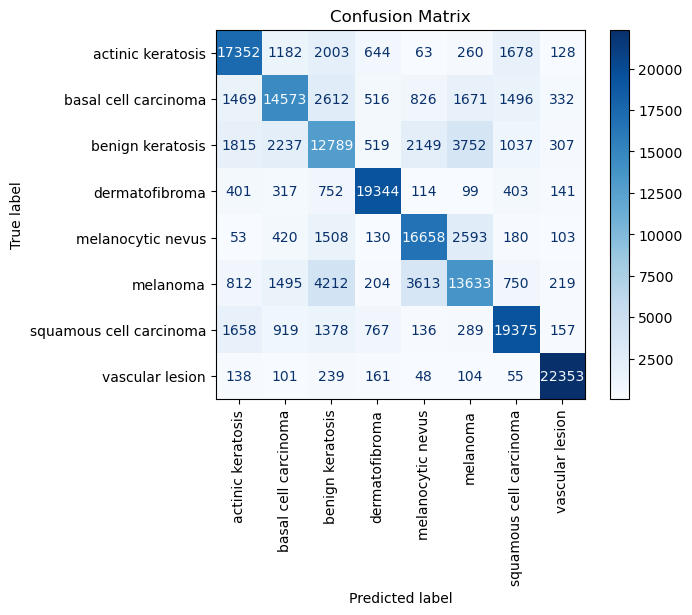

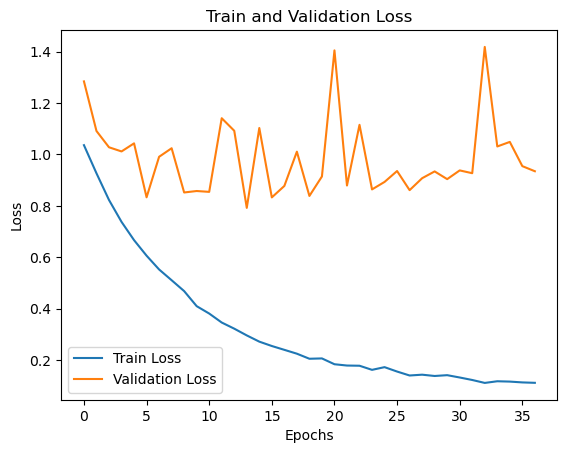

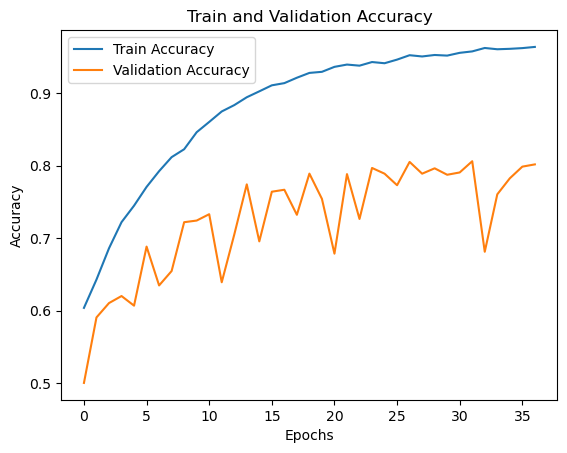

In [30]:
start_time = time.time()
model = channelmodel
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
n_epochs = 50
patience = 5
valid_loader = aug_val_loader
# Lists to store epoch metrics
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

# Early stopping counter
counter = 0

# Lists to store true labels and predictions for confusion matrix and metrics
all_labels = []
all_preds = []
all_probs = []

for epoch in range(n_epochs):
    # ---------- Training ----------
    model.train()
    train_loss = []
    train_accs = []

    for batch in tqdm(aug_train_loader, desc=f"Epoch {epoch+1}/{n_epochs} [Training]"):
        optimizer.zero_grad()
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        logits = model(imgs)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # ---------- Validation ----------
    model.eval()
    valid_loss = []
    valid_accs = []

    # Clear lists to store labels and predictions for this epoch
    epoch_labels = []
    epoch_preds = []
    epoch_probs = []

    for batch in tqdm(valid_loader, desc=f"Epoch {epoch+1}/{n_epochs} [Validation]"):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            logits = model(imgs)
        loss = criterion(logits, labels)
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

        # Store predictions and labels for confusion matrix and metrics
        epoch_preds.extend(logits.argmax(dim=-1).cpu().numpy().tolist())
        epoch_labels.extend(labels.cpu().numpy().tolist())
        epoch_probs.extend(torch.nn.functional.softmax(logits, dim=1).cpu().numpy().tolist())  # Collect all probabilities

    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Update the overall lists for confusion matrix and metrics
    all_labels.extend(epoch_labels)
    all_preds.extend(epoch_preds)
    all_probs.extend(epoch_probs)  # Accumulate probabilities for all classes

    # Save the best model based on validation accuracy
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(model.state_dict(), 'best_model.pth')
        counter = 0  # Reset counter when there's an improvement
    else:
        counter += 1  # Increment counter when there's no improvement
        if counter >= patience:
            print("Early stopping triggered. No improvement in validation accuracy.")
            break

    # Print the information
    print(f"""[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} 
                | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}""")

# After training, compute metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')  # Use 'macro' for multi-class
recall = recall_score(all_labels, all_preds, average='macro')        # Use 'macro' for multi-class
auc = roc_auc_score(all_labels, all_probs, multi_class='ovr')        # Use 'ovr' for multi-class AUC

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC: {auc:.4f}')

# Compute and display the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
buf_cm = plot_to_buffer()
plt.show()  # Close the plot to free memory

# Loss curves plot
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
buf_loss = plot_to_buffer()
plt.show()  # Close the plot to free memory

# Accuracy curves plot
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
buf_acc = plot_to_buffer()
plt.show() 

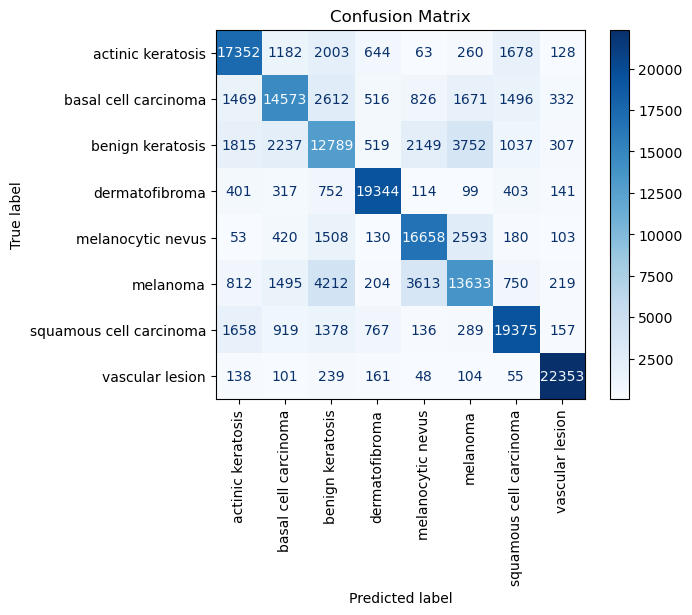

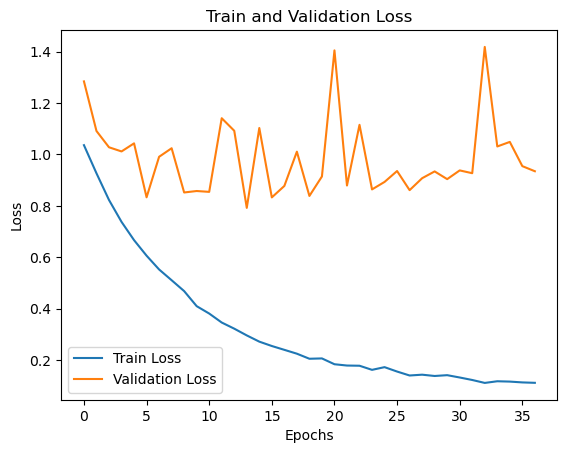

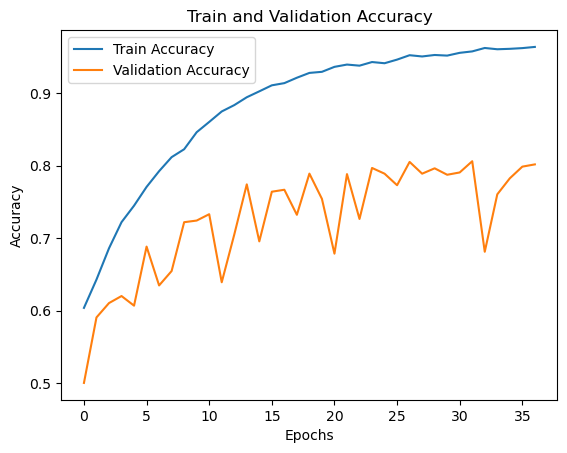

In [31]:
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [32]:
model.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
model.eval()

test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(aug_test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
      logits = model(imgs)

    # We can still compute the loss (but not the gradient).
    loss = criterion(logits, labels)

    # Compute the accuracy for current batch.
    acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record accuracy.
    test_accs.append(acc)

# The average accuracy for entire test set is the average of the recorded values.
test_acc = sum(test_accs) / len(test_accs)
print(f'Test accuracy {test_acc}')

100%|████████████████████████████████████████████████████████████████████████████████| 159/159 [01:38<00:00,  1.61it/s]

Test accuracy 0.8117674589157104


In [33]:
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

body = f"""Channel attention CNN has completed training. \n
        Completed at {formatted_timestamp} 
        Time taken to run: {formatted_time}
        Accuracy: {accuracy}
        Precision: {precision}
        Recall: {recall}
        AUC: {auc}
       Best Validation Accuracy: {max(valid_acc_epochs)}
        Test Accuracy: {test_acc}
        """


attachments = [
    {'buffer': buf_cm, 'filename': 'confusion_matrix.png'},
    {'buffer': buf_loss, 'filename': 'loss_curves.png'},
    {'buffer': buf_acc, 'filename': 'accuracy_curves.png'}
]

send_email(from_address, to_address, subject, body, smtp_server, smtp_port, login, password, attachments)
clear_cuda()

Email sent successfully!


CNN with Self attention mechanism

In [36]:
# Training parameters
start_time = time.time()
model = selfmodel
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 50
patience = 5
valid_loader = aug_val_loader
# Lists to store epoch metrics
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

# Early stopping counter
counter = 0

# Lists to store true labels and predictions for confusion matrix and metrics
all_labels = []
all_preds = []
all_probs = []

for epoch in range(n_epochs):
    # ---------- Training ----------
    model.train()
    train_loss = []
    train_accs = []

    for batch in tqdm(aug_train_loader, desc=f"Epoch {epoch+1}/{n_epochs} [Training]"):
        optimizer.zero_grad()
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        logits = model(imgs)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # ---------- Validation ----------
    model.eval()
    valid_loss = []
    valid_accs = []

    # Clear lists to store labels and predictions for this epoch
    epoch_labels = []
    epoch_preds = []
    epoch_probs = []

    for batch in tqdm(valid_loader, desc=f"Epoch {epoch+1}/{n_epochs} [Validation]"):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            logits = model(imgs)
        loss = criterion(logits, labels)
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

        # Store predictions and labels for confusion matrix and metrics
        epoch_preds.extend(logits.argmax(dim=-1).cpu().numpy().tolist())
        epoch_labels.extend(labels.cpu().numpy().tolist())
        epoch_probs.extend(torch.nn.functional.softmax(logits, dim=1).cpu().numpy().tolist())  # Collect all probabilities

    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # Update the overall lists for confusion matrix and metrics
    all_labels.extend(epoch_labels)
    all_preds.extend(epoch_preds)
    all_probs.extend(epoch_probs)  # Accumulate probabilities for all classes

    # Save the best model based on validation accuracy
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(model.state_dict(), 'best_model.pth')
        counter = 0  # Reset counter when there's an improvement
    else:
        counter += 1  # Increment counter when there's no improvement
        if counter >= patience:
            print("Early stopping triggered. No improvement in validation accuracy.")
            break

    # Print the information
    print(f"""[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} 
                | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}""")

# After training, compute metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')  # Use 'macro' for multi-class
recall = recall_score(all_labels, all_preds, average='macro')        # Use 'macro' for multi-class
auc = roc_auc_score(all_labels, all_probs, multi_class='ovr')        # Use 'ovr' for multi-class AUC

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC: {auc:.4f}')

# Compute and display the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
buf_cm = plot_to_buffer()
plt.close()  # Close the plot to free memory

# Loss curves plot
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
buf_loss = plot_to_buffer()
plt.close()  # Close the plot to free memory

# Accuracy curves plot
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
buf_acc = plot_to_buffer()
plt.close() 

Epoch 1/50 [Training]:   0%|                                                                   | 0/475 [00:05<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 18.76 GiB. GPU 0 has a total capacity of 8.00 GiB of which 5.93 GiB is free. Of the allocated memory 888.25 MiB is allocated by PyTorch, and 97.75 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
model.load_state_dict(torch.load('best_model.pth'))

# Make sure the model is in eval mode.
# Some modules like Dropout or BatchNorm affect if the model is in training mode.
model.eval()

test_accs = []

# Iterate the testing set by batches.
for batch in tqdm(aug_test_loader):
    # A batch consists of image data and corresponding labels.
    imgs, labels = batch
    imgs = imgs.to(device)
    labels = labels.to(device)

    # We don't need gradient in test
    # Using torch.no_grad() accelerates the forward process.
    with torch.no_grad():
      logits = model(imgs)

    # We can still compute the loss (but not the gradient).
    loss = criterion(logits, labels)

    # Compute the accuracy for current batch.
    acc = (logits.argmax(dim=-1) == labels).float().mean()

    # Record accuracy.
    test_accs.append(acc)

# The average accuracy for entire test set is the average of the recorded values.
test_acc = sum(test_accs) / len(test_accs)
print(f'Test accuracy {test_acc}')

In [ ]:
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

body = f"""Self attention CNN has completed training. \n
        Completed at {formatted_timestamp} 
        Time taken to run: {formatted_time}
        Accuracy: {accuracy}
        Precision: {precision}
        Recall: {recall}
        AUC: {auc}
        Best Validation Accuracy: {max(valid_acc_epochs)}
        Test Accuracy: {test_acc}
        """


attachments = [
    {'buffer': buf_cm, 'filename': 'confusion_matrix.png'},
    {'buffer': buf_loss, 'filename': 'loss_curves.png'},
    {'buffer': buf_acc, 'filename': 'accuracy_curves.png'}
]

send_email(from_address, to_address, subject, body, smtp_server, smtp_port, login, password, attachments)
clear_cuda()

In [ ]:
clear_cuda()